### 精通機器學習 - 使用Scikit-Learn, Keras與TensorFlow. ver 2
#### section 4-1 線性回歸 (linear regression)

In [20]:
import numpy as np
import matplotlib.pyplot as plt

製作一些看起來線性的資料，用來測試方程式

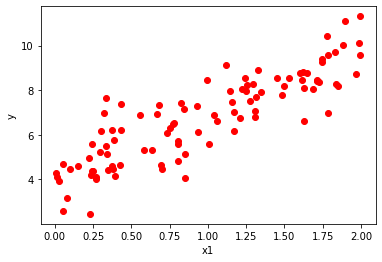

In [27]:
x= 2* np.random.rand(100, 1)
y= 4+ 3* x+ np.random.randn(100, 1)

# graph draw
fig = plt.figure()
ax= fig.add_subplot(111)
ax.plot(x, y, "o",color= "red")
ax.set_xlabel("x1")
ax.set_ylabel("y")
plt.show()

設定一線性回歸模型:  
$\hat{y} = \theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n}$
<br>

此模型預測結果與真實數據的擬和誤差可以用RMSE計算, 另外求一 $\theta$讓模型誤差最小化時, 可改用MSE, 計算較簡單快速  
(可將函數最小化的值, 也可將函數的平方根最小化!)
<br>

$MSE(X,h_{\theta}) = \frac{1}{m}\sum_{i=1}^{m} {(\theta^{\mathrm T}x^{(i)}-y^{(i)})^2}$
<br>


求解方案一. **正規方程式求$\theta$**  
封閉式解決方案，可以直接用公式算出結果  
$\hat{\theta} = (X^{\mathrm T}X)^{-1}X^{\mathrm T}y $

In [22]:
x_b= np.c_[np.ones((100, 1)), x] #為每個實例加上 x0 = 1
print(x.shape)
print(x_b.shape)
print('----------------')

# 正規方程式計算
theta_best= np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print(theta_best)

(100, 1)
(100, 2)
----------------
[[4.04382012]
 [2.94010399]]


計算所得的 $\theta$ 數值與線性數據設定的不同, 主要是因為noise影響  
依據算出結果繪圖觀察

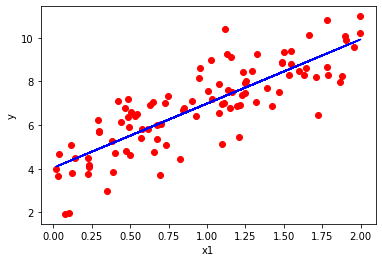

In [25]:
y2= theta_best[0]+ theta_best[1]*x

# graph draw
plt.plot(x, y, "o",color= "red")
plt.plot(x, y2, color= "blue")

plt.xlabel("x1")
plt.ylabel("y")
plt.show()

求解方案二. Error based learning method  
透過不斷的將誤差反向傳播(Backpropagation)疊代修正參數的作法, 得到 $\theta$ 值